In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Exploaratory Data

Overview dataset and check number rows and columns in dataset

In [2]:
df = pd.read_excel("./dataset/datasetOptikRandom.xlsx")
df.head()

,Kanal,spasi_kanal (GHz),power (dBm),panjang_kabel (Km),redaman (dBm/km),frekuensi (THz),osnr 1 (dB),q_factor 1,Nilai BER 1,Kondisi BER,Level
0,8,200,2,50,0.1,191.5,36.93,16.66,1.217760e-62,Baik,Optimal
1,4,200,2,50,0.0,191.5,36.93,16.65,1.388090e-62,Baik,Optimal
2,4,200,2,50,0.1,191.5,36.93,16.58,4.486180e-62,Baik,Optimal
3,16,200,5,50,0.0,191.5,36.91,16.51,1.551160e-61,Baik,Optimal
4,16,200,2,50,0.1,191.5,36.93,16.50,1.720510e-61,Baik,Optimal


In [3]:
df.shape

(900, 11)

Rename columns in dataset

In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.rename(columns={"osnr_1_(db)":"osnr_(db)",
                  "q_factor_1":"q_factor",
                  "nilai_ber_1":"nilai_ber"}, inplace=True)

In [5]:
df.head()

,kanal,spasi_kanal_(ghz),power_(dbm),panjang_kabel_(km),redaman_(dbm/km),frekuensi_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level
0,8,200,2,50,0.1,191.5,36.93,16.66,1.217760e-62,Baik,Optimal
1,4,200,2,50,0.0,191.5,36.93,16.65,1.388090e-62,Baik,Optimal
2,4,200,2,50,0.1,191.5,36.93,16.58,4.486180e-62,Baik,Optimal
3,16,200,5,50,0.0,191.5,36.91,16.51,1.551160e-61,Baik,Optimal
4,16,200,2,50,0.1,191.5,36.93,16.50,1.720510e-61,Baik,Optimal


In [6]:
df.rename(columns={"kanal": "channel",
                  "spasi_kanal_(ghz)":"channel_spacing_(ghz)",
                  "panjang_kabel_(km)":"cable_length_(km)",
                  "redaman_(dbm/km)":"dumping_(dbm/km)",
                  "frekuensi_(thz)": "frequency_(thz)"}, inplace=True)
df.head()

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level
0,8,200,2,50,0.1,191.5,36.93,16.66,1.217760e-62,Baik,Optimal
1,4,200,2,50,0.0,191.5,36.93,16.65,1.388090e-62,Baik,Optimal
2,4,200,2,50,0.1,191.5,36.93,16.58,4.486180e-62,Baik,Optimal
3,16,200,5,50,0.0,191.5,36.91,16.51,1.551160e-61,Baik,Optimal
4,16,200,2,50,0.1,191.5,36.93,16.50,1.720510e-61,Baik,Optimal


Descriptive statistic to check mean, count, standard devitiation, q1, q1 for numerical value

In [7]:
df.describe()

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000,9.000000e+02
mean,8.960000,125.000000,2.500000,58.666667,0.180000,191.5,31.821456,9.658111,2.271000e-08
std,5.097772,55.633674,1.708775,7.976607,0.146141,0.0,5.885542,3.407319,1.105307e-07
min,4.000000,50.000000,0.000000,50.000000,0.000000,191.5,21.910000,4.570000,1.217760e-62
25%,4.000000,100.000000,1.000000,50.000000,0.100000,191.5,31.770000,7.330000,1.470750e-36
50%,8.000000,125.000000,2.500000,60.000000,0.200000,191.5,31.985000,8.880000,5.745470e-19
75%,16.000000,150.000000,4.000000,70.000000,0.300000,191.5,36.455000,12.577500,1.148067e-13
max,16.000000,200.000000,5.000000,70.000000,0.500000,191.5,36.970000,16.660000,1.856940e-06


Checking the data type of each column, we found two object values

In [8]:
df.dtypes

channel                    int64
channel_spacing_(ghz)      int64
power_(dbm)                int64
cable_length_(km)          int64
dumping_(dbm/km)         float64
frequency_(thz)          float64
osnr_(db)                float64
q_factor                 float64
nilai_ber                float64
kondisi_ber               object
level                     object
dtype: object

Check missing value and duplucated in the dataset, we know that there is no missing value and duplcated data

In [9]:
df.isnull().sum()

channel                  0
channel_spacing_(ghz)    0
power_(dbm)              0
cable_length_(km)        0
dumping_(dbm/km)         0
frequency_(thz)          0
osnr_(db)                0
q_factor                 0
nilai_ber                0
kondisi_ber              0
level                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

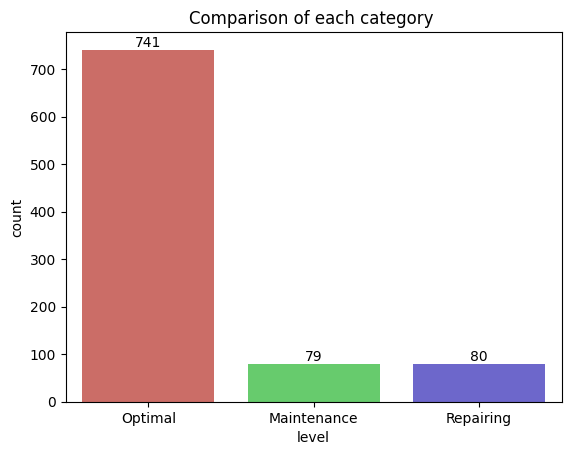

In [11]:
s = sns.countplot(x=df["level"], color = 'blue', palette = 'hls', legend=False, hue=df["level"])

for i in s.containers:
    s.bar_label(i)

plt.title("Comparison of each category ")

plt.show()

In [12]:
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level
0,4,150,4,60,0.0,191.5,36.40,10.32,2.716390e-25,Baik,Optimal
1,8,150,4,50,0.2,191.5,36.39,15.57,5.787540e-55,Baik,Optimal
2,8,50,4,50,0.0,191.5,22.10,7.49,3.456160e-14,Baik,Optimal
3,8,200,5,70,0.2,191.5,36.89,7.60,1.465290e-14,Baik,Optimal
4,4,150,3,60,0.2,191.5,36.28,10.14,1.771550e-24,Baik,Optimal


Check unique values in each columns

In [13]:
print("Nilai Unique Value Setiap Kolom\n")
for i in df.columns:
  print(f"{i} {df[i].nunique()}")

Nilai Unique Value Setiap Kolom

channel 3
channel_spacing_(ghz) 4
power_(dbm) 6
cable_length_(km) 3
dumping_(dbm/km) 6
frequency_(thz) 1
osnr_(db) 88
q_factor 482
nilai_ber 894
kondisi_ber 3
level 3


Outlier Analysis

In [14]:
def check_outlier(col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1
  upper = 1.5 * iqr + q3
  lower = 1.5 * iqr - q1

  return df[(df[col] < lower) | (df[col] > upper)]

In [15]:
check_outlier("osnr_(db)")

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level


In [16]:
check_outlier("q_factor")

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level


In [17]:
check_outlier("nilai_ber")

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),frequency_(thz),osnr_(db),q_factor,nilai_ber,kondisi_ber,level
0,4,150,4,60,0.0,191.5,36.40,10.32,2.716390e-25,Baik,Optimal
1,8,150,4,50,0.2,191.5,36.39,15.57,5.787540e-55,Baik,Optimal
2,8,50,4,50,0.0,191.5,22.10,7.49,3.456160e-14,Baik,Optimal
3,8,200,5,70,0.2,191.5,36.89,7.60,1.465290e-14,Baik,Optimal
4,4,150,3,60,0.2,191.5,36.28,10.14,1.771550e-24,Baik,Optimal
...,...,...,...,...,...,...,...,...,...,...,...
895,8,200,1,70,0.0,191.5,36.95,7.65,9.678500e-15,Baik,Optimal
896,4,150,5,60,0.2,191.5,36.31,10.26,6.230810e-26,Baik,Optimal
897,4,200,5,60,0.4,191.5,36.90,9.27,9.583990e-21,Baik,Optimal
898,16,100,5,70,0.2,191.5,31.93,7.39,7.277540e-14,Baik,Optimal


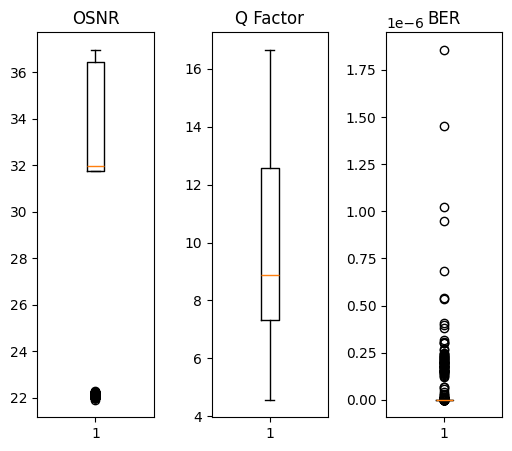

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(6, 5))

ax[0].boxplot(df["osnr_(db)"])
ax[1].boxplot(df["q_factor"])
ax[2].boxplot(df["nilai_ber"])

ax[0].set_title("OSNR")
ax[1].set_title("Q Factor")
ax[2].set_title("BER")

plt.subplots_adjust(wspace=0.5)

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23328\486263855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["nilai_ber"], kde=True)


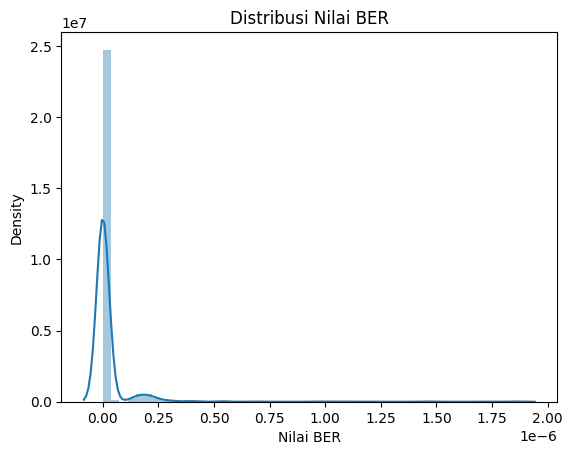

In [19]:
sns.distplot(x=df["nilai_ber"], kde=True)

plt.xlabel("Nilai BER")

plt.title("Distribusi Nilai BER")

plt.show()

In [20]:
df['level'].value_counts()

level
Optimal        741
Repairing       80
Maintenance     79
Name: count, dtype: int64

Categorical Encoding

In [21]:
df["level"] = df["level"].apply(lambda x: 0 if x == "Optimal" else 1 if x == "Maintenance" else 2)

In [22]:
df['level'].value_counts()

level
0    741
2     80
1     79
Name: count, dtype: int64

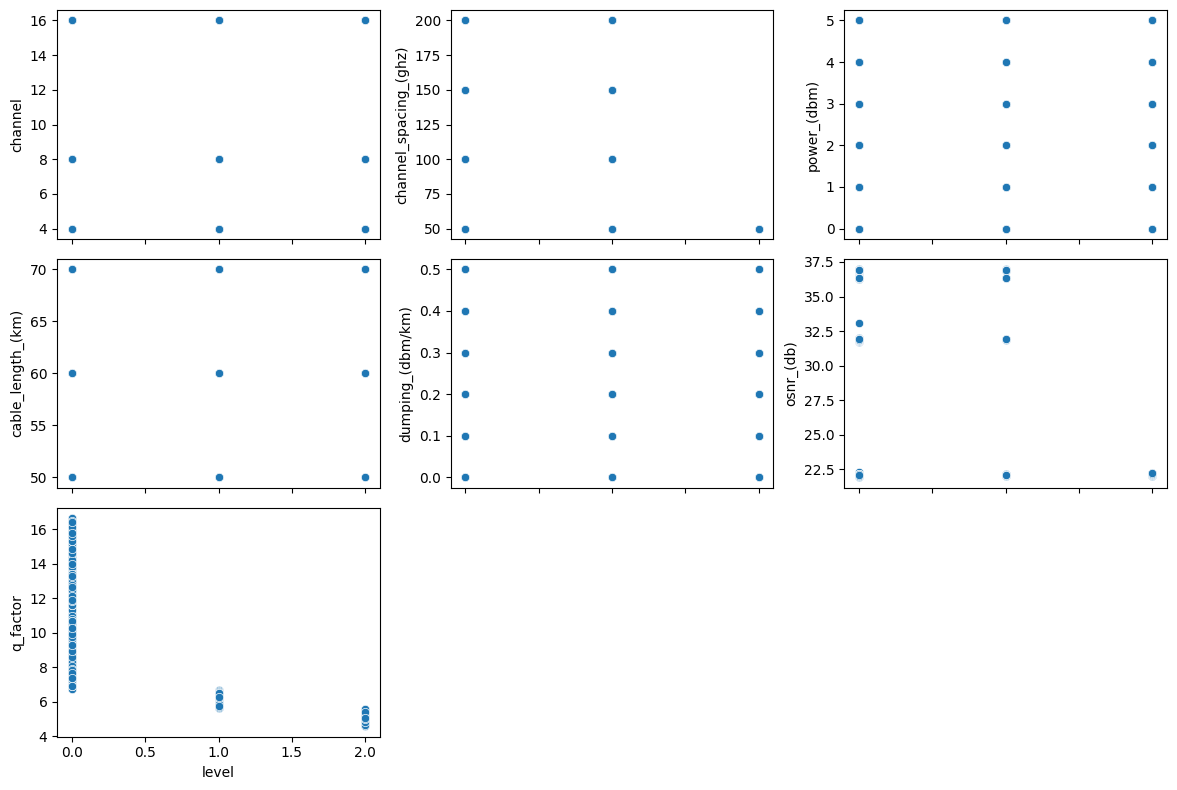

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 8), sharex=True)

sns.scatterplot(y='channel', x="level", data=df, ax=ax[0, 0])
sns.scatterplot(y='channel_spacing_(ghz)', x="level", data=df, ax=ax[0, 1])
sns.scatterplot(y='power_(dbm)', x="level", data=df, ax=ax[0, 2])
sns.scatterplot(y='cable_length_(km)', x="level", data=df, ax=ax[1, 0])
sns.scatterplot(y='dumping_(dbm/km)', x="level", data=df, ax=ax[1, 1])
sns.scatterplot(y='osnr_(db)', x="level", data=df, ax=ax[1, 2])
sns.scatterplot(y='q_factor', x="level", data=df, ax=ax[2, 0])

fig.delaxes(ax=ax[2, 1])
fig.delaxes(ax=ax[2, 2])

plt.tight_layout()

plt.show()

In [24]:
count_plot = ["channel", "channel_spacing_(ghz)",	"power_(dbm)",	"cable_length_(km)",	"dumping_(dbm/km)",	"kondisi_ber",	"level"]

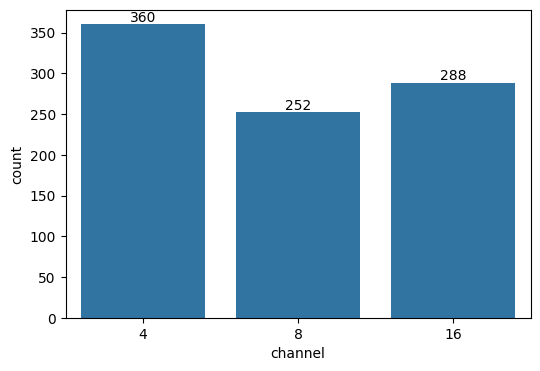

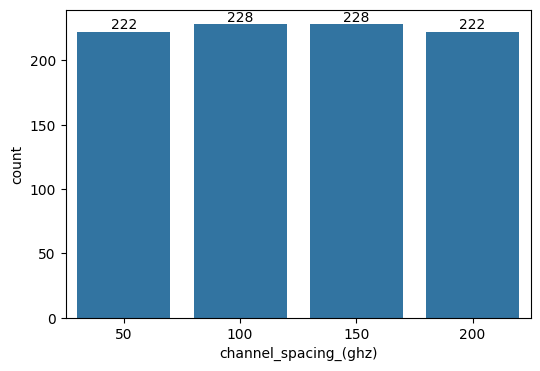

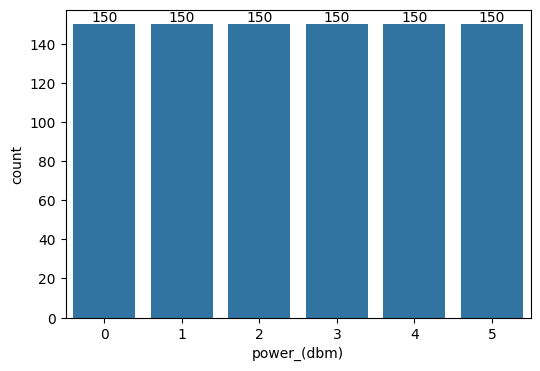

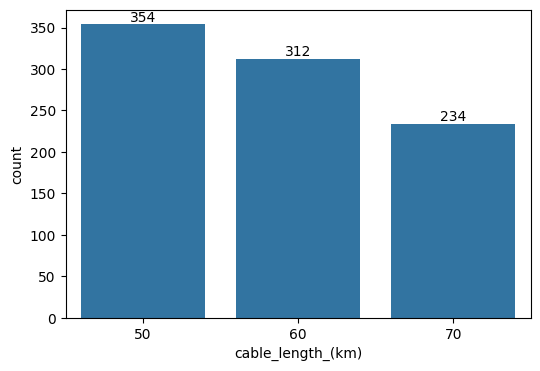

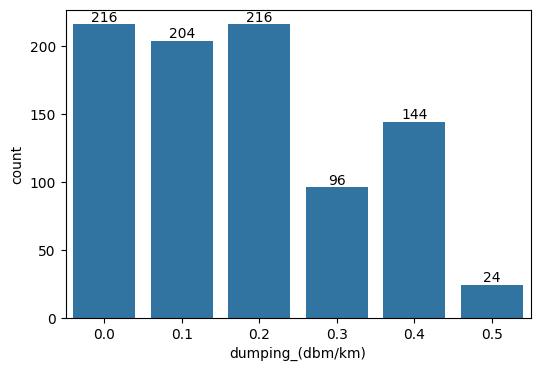

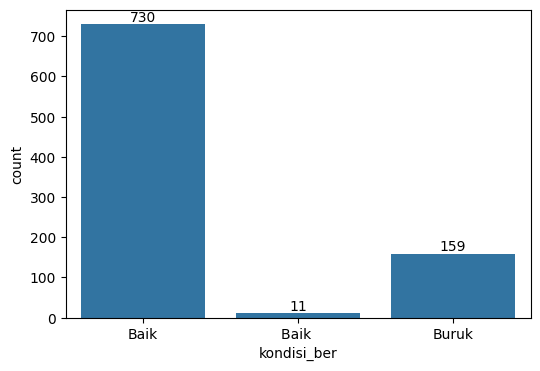

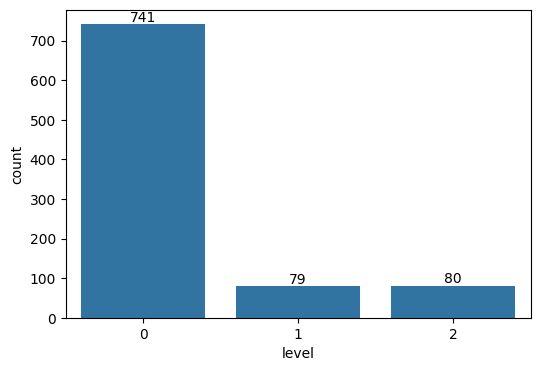

In [25]:
for i in count_plot:
  plt.figure(figsize=(6,4))
  c = sns.countplot(x = df[i])
  for i in c.containers:
    c.bar_label(i)

plt.show()

# Feature Selection

In [26]:
df.drop(columns=["frequency_(thz)", "nilai_ber", "kondisi_ber"], axis=1, inplace=True)

In [27]:
df.corr()

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),osnr_(db),q_factor,level
channel,1.000000e+00,3.901579e-18,-3.005531e-17,-2.100888e-02,-1.032031e-01,0.002581,0.050127,-0.029088
channel_spacing_(ghz),3.901579e-18,1.000000e+00,5.121400e-17,-2.255937e-02,-4.805942e-17,0.918277,0.547845,-0.535916
power_(dbm),-3.005531e-17,5.121400e-17,1.000000e+00,1.362685e-17,1.353783e-17,0.004312,0.054305,-0.053810
cable_length_(km),-2.100888e-02,-2.255937e-02,1.362685e-17,1.000000e+00,-2.519157e-01,-0.022044,-0.667906,0.332959
dumping_(dbm/km),-1.032031e-01,-4.805942e-17,1.353783e-17,-2.519157e-01,1.000000e+00,0.003058,-0.060826,0.033390
osnr_(db),2.581205e-03,9.182772e-01,4.311879e-03,-2.204366e-02,3.057506e-03,1.000000,0.610724,-0.654866
q_factor,5.012695e-02,5.478448e-01,5.430541e-02,-6.679059e-01,-6.082588e-02,0.610724,1.000000,-0.547833
level,-2.908777e-02,-5.359159e-01,-5.380958e-02,3.329591e-01,3.339005e-02,-0.654866,-0.547833,1.000000


In [28]:
df.head()

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),osnr_(db),q_factor,level
0,4,150,4,60,0.0,36.40,10.32,0
1,8,150,4,50,0.2,36.39,15.57,0
2,8,50,4,50,0.0,22.10,7.49,0
3,8,200,5,70,0.2,36.89,7.60,0
4,4,150,3,60,0.2,36.28,10.14,0


In [29]:
# !pip install seaborn --upgrade

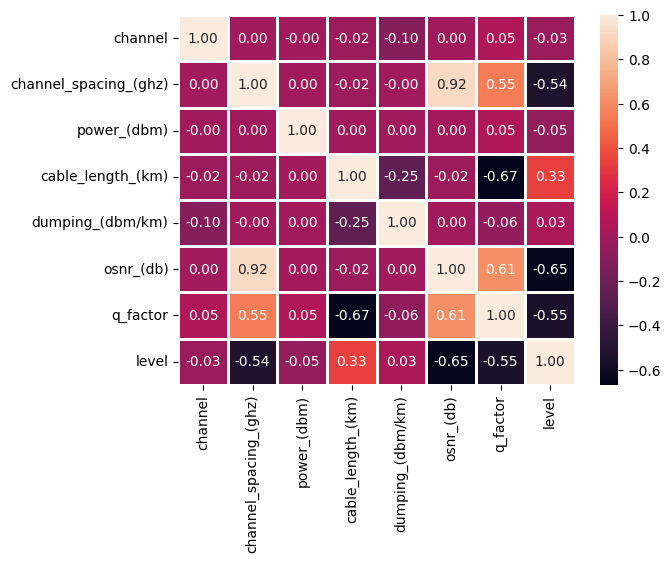

In [30]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.8)

plt.show()

In [31]:
df.corr()["level"].sort_values(ascending=False)

level                    1.000000
cable_length_(km)        0.332959
dumping_(dbm/km)         0.033390
channel                 -0.029088
power_(dbm)             -0.053810
channel_spacing_(ghz)   -0.535916
q_factor                -0.547833
osnr_(db)               -0.654866
Name: level, dtype: float64

# Build Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop("level", axis=1)
y = df["level"]

In [33]:
X

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),osnr_(db),q_factor
0,4,150,4,60,0.0,36.40,10.32
1,8,150,4,50,0.2,36.39,15.57
2,8,50,4,50,0.0,22.10,7.49
3,8,200,5,70,0.2,36.89,7.60
4,4,150,3,60,0.2,36.28,10.14
...,...,...,...,...,...,...,...
895,8,200,1,70,0.0,36.95,7.65
896,4,150,5,60,0.2,36.31,10.26
897,4,200,5,60,0.4,36.90,9.27
898,16,100,5,70,0.2,31.93,7.39


In [34]:
y.value_counts()

level
0    741
2     80
1     79
Name: count, dtype: int64

In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
895    0
896    0
897    0
898    0
899    2
Name: level, Length: 900, dtype: int64

#### Handling Imbalance Data using SMOTE

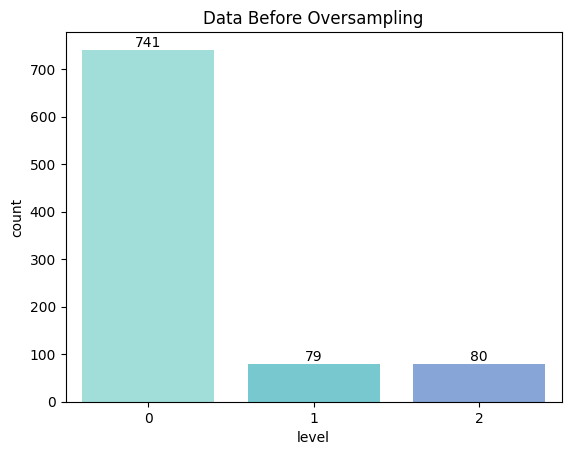

In [36]:
s = sns.countplot(x=y, palette =['#97E7E1', '#6AD4DD', '#7AA2E3'], legend=False, hue=y)

for x in s.containers:
    s.bar_label(x)
    
plt.title("Data Before Oversampling")

plt.show()

In [37]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [38]:
X

,channel,channel_spacing_(ghz),power_(dbm),cable_length_(km),dumping_(dbm/km),osnr_(db),q_factor
0,4,150,4,60,0.000000,36.400000,10.320000
1,8,150,4,50,0.200000,36.390000,15.570000
2,8,50,4,50,0.000000,22.100000,7.490000
3,8,200,5,70,0.200000,36.890000,7.600000
4,4,150,3,60,0.200000,36.280000,10.140000
...,...,...,...,...,...,...,...
2218,8,50,0,70,0.112088,22.220000,5.085165
2219,16,50,2,60,0.400000,22.036632,5.333471
2220,8,50,2,70,0.106520,22.029348,5.082718
2221,8,50,4,70,0.100000,22.130000,5.098402


In [39]:
y.value_counts()

level
0    741
1    741
2    741
Name: count, dtype: int64

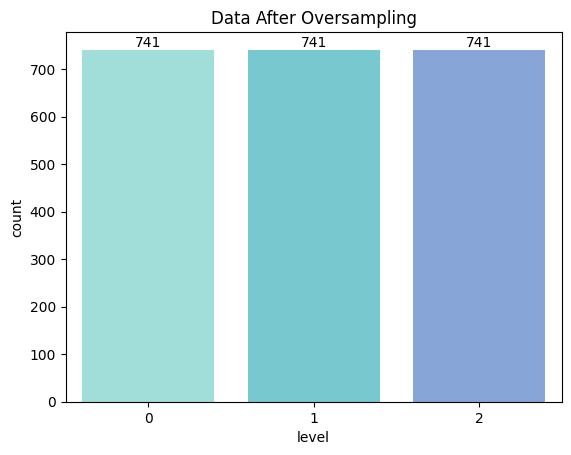

In [40]:
s = sns.countplot(x=y, palette =['#97E7E1', '#6AD4DD', '#7AA2E3'], legend=False, hue=y)

for x in s.containers:
    s.bar_label(x)
plt.title("Data After Oversampling")
plt.show()

In [41]:
X = X.values

In [42]:
y = y.values

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, make_scorer

from keras.models import Sequential
from keras.layers import Dense

## Scenario Test Size 10 %

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
X_train

array([[1.60000000e+01, 1.00000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.20000000e+01, 7.33000000e+00],
       [1.60000000e+01, 5.00000000e+01, 0.00000000e+00, ...,
        1.73218458e-01, 2.21800000e+01, 5.65535631e+00],
       [4.00000000e+00, 5.00000000e+01, 2.00000000e+00, ...,
        2.00000000e-01, 2.20326318e+01, 5.71375968e+00],
       ...,
       [4.00000000e+00, 5.00000000e+01, 5.00000000e+00, ...,
        9.01331191e-02, 2.20400000e+01, 5.83268011e+00],
       [4.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        3.16309055e-01, 2.21165236e+01, 5.82952805e+00],
       [1.60000000e+01, 1.50000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.63800000e+01, 7.85000000e+00]])

In [46]:
X_test

array([[4.00000000e+00, 2.00000000e+02, 2.00000000e+00, ...,
        5.00000000e-01, 3.68900000e+01, 8.94000000e+00],
       [4.00000000e+00, 5.00000000e+01, 3.00000000e+00, ...,
        2.36636771e-01, 2.21400000e+01, 5.76217713e+00],
       [1.60000000e+01, 5.00000000e+01, 2.00000000e+00, ...,
        9.34291361e-02, 2.20967146e+01, 5.03197126e+00],
       ...,
       [8.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        0.00000000e+00, 2.21255902e+01, 5.06706014e+00],
       [4.00000000e+00, 2.00000000e+02, 2.00000000e+00, ...,
        0.00000000e+00, 3.69200000e+01, 1.07600000e+01],
       [4.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        8.07729693e-02, 2.21426924e+01, 5.08384541e+00]])

### KNeighbors

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.93      1.00      0.96        65
           2       1.00      0.97      0.99        77

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



In [49]:
print(accuracy_score(y_train, knn.predict(X_train)))

0.9935


In [50]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.977
Accuracy: 0.978
Recall 0.979
Precision 0.976


### Support Vector

In [51]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        81
           1       0.84      0.86      0.85        65
           2       1.00      0.82      0.90        77

    accuracy                           0.90       223
   macro avg       0.90      0.89      0.89       223
weighted avg       0.91      0.90      0.90       223



In [53]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.893
Accuracy: 0.897
Recall 0.893
Precision 0.902


### Naive Bayes

In [54]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [55]:
print(y_pred_nb)

[0 1 2 1 0 0 1 0 2 2 1 2 1 0 1 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 0 0 1 0 0 1 2 0 0 0 1 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 1 2 2 1 1 2 2 0 2 1 2 2 0 2 0 0 1 1 1 0 0 1 1 1 0 0 0 2 1 1 0
 0 2 0 1 0 0 2 1 1 2 1 1 1 0 1 0 2 0 2 2 1 1 0 0 2 1 0 2 2 0 1 2 1 0 2 2 1
 2 1 1 1 1 1 0 0 1 1 0 2 1 1 0 0 2 0 1 2 1 1 2 2 2 1 0 0 0 0 1 1 1 1 2 2 0
 1 2 0 0 1 1 1 1 0 0 1 0 0 2 0 1 2 2 2 0 2 0 1 1 0 1 1 2 0 1 1 2 1 1 0 2 0
 2]


In [56]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.77      0.97      0.86        65
           2       1.00      0.78      0.88        77

    accuracy                           0.91       223
   macro avg       0.91      0.91      0.90       223
weighted avg       0.92      0.91      0.91       223



In [57]:
print("F1 Score:",round(f1_score(y_test, y_pred_nb, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_nb),3))
print("Recall", round(recall_score(y_test, y_pred_nb, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_nb, average='macro'),3))

F1 Score: 0.903
Accuracy: 0.906
Recall 0.908
Precision 0.915


### Logistic Regression Multinomial

In [58]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        81
           1       0.71      0.88      0.79        65
           2       0.93      0.82      0.87        77

    accuracy                           0.86       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.88      0.86      0.86       223



In [60]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.859
Accuracy: 0.861
Recall 0.861
Precision 0.866


### ANN

In [61]:
model = Sequential()
model.add(Dense(7, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389 (1.52 KB)

 Trainable params: 389 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5128 - loss: 2.1298
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7991 - loss: 0.4555
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8351 - loss: 0.3944
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8419 - loss: 0.3548
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8955 - loss: 0.2744
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9174 - loss: 0.2450
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9370 - loss: 0.1731
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9491 - loss: 0.1547
Epoch 9/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9546 - loss: 0.1340
Epoch 10/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9696 - loss: 0.1086
Epoch 11/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9450 - loss: 0.1695
Epoch 12/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [64]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_ann))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.88      1.00      0.94        65
           2       1.00      0.91      0.95        77

    accuracy                           0.96       223
   macro avg       0.96      0.96      0.96       223
weighted avg       0.96      0.96      0.96       223



In [65]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.958
Accuracy: 0.96
Recall 0.961
Precision 0.959


## Scenario Test Size 20

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train

array([[4.00000000e+00, 1.50000000e+02, 5.00000000e+00, ...,
        1.00000000e-01, 3.63900000e+01, 1.57900000e+01],
       [1.60000000e+01, 5.00000000e+01, 0.00000000e+00, ...,
        2.00000000e-01, 2.20726335e+01, 5.00710409e+00],
       [4.00000000e+00, 5.00000000e+01, 2.00000000e+00, ...,
        0.00000000e+00, 2.20300000e+01, 5.07000000e+00],
       ...,
       [4.00000000e+00, 5.00000000e+01, 5.00000000e+00, ...,
        9.01331191e-02, 2.20400000e+01, 5.83268011e+00],
       [4.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        3.16309055e-01, 2.21165236e+01, 5.82952805e+00],
       [1.60000000e+01, 1.50000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.63800000e+01, 7.85000000e+00]])

### KNeighbors

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.96      1.00      0.98       132
           2       1.00      0.99      0.99       156

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In [70]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.986
Accuracy: 0.987
Recall 0.987
Precision 0.986


### Support Vector

In [71]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       157
           1       0.79      0.77      0.78       132
           2       1.00      0.79      0.89       156

    accuracy                           0.86       445
   macro avg       0.87      0.86      0.86       445
weighted avg       0.87      0.86      0.86       445



In [73]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.856
Accuracy: 0.861
Recall 0.856
Precision 0.869


### Naive Bayes

In [74]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       157
           1       0.79      0.96      0.87       132
           2       1.00      0.80      0.89       156

    accuracy                           0.91       445
   macro avg       0.92      0.91      0.91       445
weighted avg       0.93      0.91      0.91       445



In [76]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.986
Accuracy: 0.987
Recall 0.987
Precision 0.986


### Logistic Regression Multinomial

In [77]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       157
           1       0.81      0.95      0.87       132
           2       1.00      0.91      0.95       156

    accuracy                           0.92       445
   macro avg       0.92      0.92      0.92       445
weighted avg       0.93      0.92      0.92       445



In [79]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.918
Accuracy: 0.919
Recall 0.921
Precision 0.922


### ANN

In [80]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5523 - loss: 0.9865
Epoch 2/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8351 - loss: 0.4276
Epoch 3/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8335 - loss: 0.3971
Epoch 4/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8366 - loss: 0.3857
Epoch 5/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - loss: 0.3368
Epoch 6/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8641 - loss: 0.3245
Epoch 7/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8686 - loss: 0.2977
Epoch 8/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.2603
Epoch 9/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8842 - loss: 0.2797
Epoch 10/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9162 - loss: 0.1935
Epoch 11/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9385 - loss: 0.1613
Epoch 12/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [83]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_ann))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       157
           1       0.95      0.95      0.95       132
           2       0.97      0.97      0.97       156

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



In [84]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.97
Accuracy: 0.971
Recall 0.97
Precision 0.97


## Scenario Test Size 30

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X_train

array([[8.00000000e+00, 5.00000000e+01, 0.00000000e+00, ...,
        1.12088169e-01, 2.22200000e+01, 5.08516473e+00],
       [4.00000000e+00, 5.00000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 2.21394725e+01, 5.10105503e+00],
       [4.00000000e+00, 5.00000000e+01, 1.00000000e+00, ...,
        2.00000000e-01, 2.21600000e+01, 5.71000000e+00],
       ...,
       [4.00000000e+00, 5.00000000e+01, 5.00000000e+00, ...,
        9.01331191e-02, 2.20400000e+01, 5.83268011e+00],
       [4.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        3.16309055e-01, 2.21165236e+01, 5.82952805e+00],
       [1.60000000e+01, 1.50000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.63800000e+01, 7.85000000e+00]])

### KNeighbors

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       233
           1       0.96      0.99      0.97       204
           2       1.00      0.98      0.99       230

    accuracy                           0.98       667
   macro avg       0.98      0.98      0.98       667
weighted avg       0.98      0.98      0.98       667



In [89]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.982
Accuracy: 0.982
Recall 0.982
Precision 0.981


### Support Vector

In [90]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       233
           1       0.79      0.76      0.78       204
           2       1.00      0.79      0.88       230

    accuracy                           0.85       667
   macro avg       0.87      0.85      0.85       667
weighted avg       0.87      0.85      0.85       667



In [92]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.85
Accuracy: 0.855
Recall 0.85
Precision 0.866


### Naive Bayes

In [93]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       233
           1       0.81      0.97      0.88       204
           2       1.00      0.81      0.90       230

    accuracy                           0.92       667
   macro avg       0.93      0.92      0.92       667
weighted avg       0.93      0.92      0.92       667



In [95]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.982
Accuracy: 0.982
Recall 0.982
Precision 0.981


### Logistic Regression Multinomial

In [96]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       233
           1       0.73      0.94      0.82       204
           2       1.00      0.89      0.94       230

    accuracy                           0.88       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.90      0.88      0.88       667



In [98]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.878
Accuracy: 0.877
Recall 0.88
Precision 0.89


### ANN

In [99]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6260 - loss: 2.1847
Epoch 2/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8002 - loss: 0.5847
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7860 - loss: 0.4932
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8252 - loss: 0.4353
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.4162
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8291 - loss: 0.3885
Epoch 7/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8411 - loss: 0.3814
Epoch 8/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.3523
Epoch 9/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8578 - loss: 0.3501
Epoch 10/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8643 - loss: 0.3486
Epoch 11/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8851 - loss: 0.2889
Epoch 12/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [102]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_ann))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       233
           1       0.78      0.94      0.85       204
           2       1.00      0.97      0.99       230

    accuracy                           0.90       667
   macro avg       0.91      0.90      0.90       667
weighted avg       0.91      0.90      0.90       667



In [103]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.9
Accuracy: 0.901
Recall 0.903
Precision 0.906


## Scenario Test Size 40

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [105]:
X_train

array([[8.00000000e+00, 5.00000000e+01, 3.00000000e+00, ...,
        1.62755808e-01, 2.20890314e+01, 5.07627558e+00],
       [6.00000000e+00, 2.00000000e+02, 0.00000000e+00, ...,
        4.35599148e-01, 3.69342397e+01, 6.58728102e+00],
       [1.60000000e+01, 5.00000000e+01, 0.00000000e+00, ...,
        2.00000000e-01, 2.21646745e+01, 5.66532546e+00],
       ...,
       [4.00000000e+00, 5.00000000e+01, 5.00000000e+00, ...,
        9.01331191e-02, 2.20400000e+01, 5.83268011e+00],
       [4.00000000e+00, 5.00000000e+01, 4.00000000e+00, ...,
        3.16309055e-01, 2.21165236e+01, 5.82952805e+00],
       [1.60000000e+01, 1.50000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.63800000e+01, 7.85000000e+00]])

### KNeighbors

In [106]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       304
           1       0.97      0.96      0.96       285
           2       1.00      0.99      0.99       301

    accuracy                           0.98       890
   macro avg       0.98      0.98      0.98       890
weighted avg       0.98      0.98      0.98       890



In [108]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.977
Accuracy: 0.978
Recall 0.977
Precision 0.978


### Support Vector

In [109]:
svc = SVC(kernel='rbf',
               gamma=0.5,
               C=0.1)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       304
           1       0.79      0.77      0.78       285
           2       1.00      0.78      0.87       301

    accuracy                           0.85       890
   macro avg       0.87      0.85      0.85       890
weighted avg       0.87      0.85      0.85       890



In [111]:
print("F1 Score:",round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_svc),3))
print("Recall", round(recall_score(y_test, y_pred_svc, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_svc, average='macro'),3))

F1 Score: 0.849
Accuracy: 0.852
Recall 0.85
Precision 0.865


### Naive Bayes

In [112]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.82      0.96      0.89       285
           2       1.00      0.81      0.89       301

    accuracy                           0.92       890
   macro avg       0.93      0.92      0.92       890
weighted avg       0.93      0.92      0.92       890



In [114]:
print("F1 Score:",round(f1_score(y_test, y_pred_knn, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_knn),3))
print("Recall", round(recall_score(y_test, y_pred_knn, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_knn, average='macro'),3))

F1 Score: 0.977
Accuracy: 0.978
Recall 0.977
Precision 0.978


### Logistic Regression Multinomial

In [115]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       304
           1       0.76      0.92      0.83       285
           2       1.00      0.83      0.91       301

    accuracy                           0.88       890
   macro avg       0.89      0.88      0.88       890
weighted avg       0.90      0.88      0.88       890



In [117]:
print("F1 Score:",round(f1_score(y_test, y_pred_lr, average='macro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_lr),3))
print("Recall", round(recall_score(y_test, y_pred_lr, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_lr, average='macro'),3))

F1 Score: 0.883
Accuracy: 0.881
Recall 0.882
Precision 0.894


### ANN

In [118]:
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs =15, batch_size = 5, shuffle=True, verbose=1)


Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3786 - loss: 8.3762
Epoch 2/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7054 - loss: 0.6107
Epoch 3/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7548 - loss: 0.5067
Epoch 4/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.4535
Epoch 5/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4389
Epoch 6/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.3938
Epoch 7/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3449
Epoch 8/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.3044
Epoch 9/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3304
Epoch 10/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.2693
Epoch 11/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.2601
Epoch 12/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [121]:
# y_pred_ann = model.predict(X_test).round()
y_pred_prob = model.predict(X_test)
y_pred_ann = tf.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_ann))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       304
           1       0.88      0.97      0.92       285
           2       1.00      0.96      0.98       301

    accuracy                           0.95       890
   macro avg       0.95      0.95      0.95       890
weighted avg       0.95      0.95      0.95       890



In [122]:
print("F1 Score:",round(f1_score(y_test, y_pred_ann, average='micro'),3))
print("Accuracy:",round(accuracy_score(y_test, y_pred_ann),3))
print("Recall", round(recall_score(y_test, y_pred_ann, average='macro'), 3))
print("Precision", round(precision_score(y_test, y_pred_ann, average='macro'),3))

F1 Score: 0.946
Accuracy: 0.946
Recall 0.947
Precision 0.948


# PENGUJIAN ML ALGORITMA KNN

## PENGUJIAN ALGORITMA KNN RATIO 90:10

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

[0 1 2 2 0 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 1 2 0 0 0 2 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 0 2 2 1 1 2 2 0 2 1 2 2 1 2 0 0 1 1 1 0 0 1 1 1 0 0 0 2 1 1 0
 0 2 0 1 0 0 2 2 1 2 2 1 2 0 2 0 2 0 2 2 1 1 0 0 2 1 0 2 2 0 1 2 1 0 2 2 1
 2 1 1 1 1 1 0 0 2 1 0 2 1 2 0 1 2 0 1 2 1 1 2 2 2 1 0 0 0 0 1 1 0 1 2 2 0
 1 2 0 0 2 1 1 2 0 0 1 0 0 2 0 1 2 2 2 0 2 0 1 1 0 1 1 2 0 1 0 2 2 2 0 2 0
 2]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.93      0.98      0.96        65
           2       1.00      0.95      0.97        77

    accuracy                           0.97       223
   macro avg       0.97      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223

[0 1 2 2 0 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 1 2 0 0 0 2 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 0 

## PENGUJIAN ALGORITMA KNN RATIO 80:20

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

[0 1 2 2 0 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 1 2 0 0 0 2 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 0 2 2 1 1 2 2 0 2 1 2 2 1 2 0 0 1 1 1 0 0 1 1 1 0 0 0 2 1 1 0
 0 2 0 1 0 0 2 2 1 2 2 1 2 0 2 0 2 0 2 2 1 1 0 0 2 1 0 2 2 0 1 2 1 0 2 2 1
 2 1 1 1 1 1 0 0 2 1 0 2 1 1 0 1 2 0 1 2 1 1 2 2 2 1 0 0 0 0 1 1 0 1 2 2 0
 1 2 0 0 2 1 1 2 0 0 1 0 0 2 0 1 2 2 2 0 2 0 1 1 0 1 1 2 0 1 0 2 2 1 0 2 0
 2 0 1 1 2 0 1 2 0 1 0 2 1 0 2 2 0 2 2 0 1 2 1 0 2 0 2 2 1 1 0 2 0 2 0 0 1
 2 1 0 0 1 0 2 1 0 1 1 0 0 2 0 0 1 2 1 0 0 1 1 1 2 1 1 2 1 1 2 0 1 2 0 2 0
 0 1 2 1 0 2 2 0 0 1 0 0 0 1 2 2 2 2 1 1 1 2 0 2 0 0 0 0 1 0 2 0 1 2 0 1 1
 1 2 0 2 0 1 2 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 1 1 0 1 0 2 0 2 0 1 0 2 0 0 2
 0 1 0 0 1 2 2 1 1 2 0 0 0 2 2 2 2 2 1 1 2 2 0 1 2 0 1 0 1 2 1 0 1 0 2 2 2
 0 1 0 0 1 1 2 2 1 1 2 0 1 1 2 0 2 2 1 2 1 0 2 2 2 0 1 0 0 0 2 2 2 2 2 0 0
 1]
              precision    recall  f1-score   support

           0       0.95      0.99      0.

## PENGUJIAN ALGORITMA KNN RATIO 70:30

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

[0 1 2 2 0 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 1 2 0 0 0 2 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 0 2 2 1 1 2 2 0 2 1 2 2 1 2 0 0 1 1 1 0 0 0 1 1 0 0 0 2 1 1 0
 0 2 0 1 0 0 2 2 1 2 1 1 1 0 2 0 2 0 2 2 1 1 0 0 2 1 0 2 2 0 1 2 1 0 2 2 1
 2 1 1 1 1 1 0 0 2 1 0 2 1 1 0 1 2 0 1 2 1 1 2 2 2 1 0 0 0 0 1 1 0 1 2 2 0
 1 2 0 0 2 1 1 2 0 0 1 0 0 2 0 1 2 2 2 0 2 0 1 1 0 1 1 2 0 1 0 2 2 1 0 2 0
 2 0 1 1 2 0 1 2 0 1 0 2 1 0 1 2 0 2 2 0 1 2 1 0 2 0 2 2 1 1 0 2 0 2 0 0 1
 2 1 0 0 1 0 2 1 0 1 1 0 0 2 0 0 1 2 1 0 0 1 1 1 2 0 1 2 1 1 2 0 1 2 0 2 0
 0 1 2 1 0 2 2 0 0 1 0 0 0 1 2 2 2 2 1 1 0 2 0 2 0 0 0 0 1 0 2 0 1 2 0 1 1
 1 2 0 1 0 1 2 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 1 1 0 1 0 2 0 2 0 1 0 2 0 0 2
 0 1 0 0 1 2 2 1 1 2 0 0 0 2 2 2 2 2 1 1 2 2 0 1 2 0 1 0 1 2 1 0 0 0 2 2 2
 0 1 0 0 1 1 2 2 1 1 2 0 1 1 2 0 2 2 0 2 1 0 2 2 2 0 1 0 0 0 2 2 2 2 2 0 0
 1 0 2 2 0 2 0 0 0 0 1 1 1 0 1 2 1 0 0 0 2 2 1 0 1 1 1 0 1 2 2 1 1 2 0 2 2
 0 0 1 2 0 1 0 0 0 2 0 2 

## PENGUJIAN ALGORITMA KNN RATIO 60:40

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
print(classification_report(y_test, y_pred_knn))

[0 1 2 2 0 0 1 0 2 2 1 2 1 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 0 2 0 2 0 1 0 2 0
 1 0 1 0 0 1 2 0 0 0 2 2 0 2 2 1 0 2 1 1 1 0 1 1 0 0 0 1 2 0 2 1 2 1 2 2 0
 0 2 2 1 0 1 0 2 2 1 1 2 2 0 2 1 2 2 1 2 0 0 1 1 1 0 0 0 1 1 0 0 0 2 1 1 0
 0 2 0 1 0 0 2 2 1 2 1 1 1 0 2 0 2 0 2 2 1 1 0 0 2 0 0 2 2 0 1 2 1 0 2 2 1
 1 1 1 1 1 1 0 0 1 1 0 2 1 1 0 0 2 0 1 2 1 1 2 2 2 1 0 0 0 0 1 1 0 1 2 2 0
 1 2 0 0 1 1 1 1 0 0 1 0 0 2 0 1 2 1 2 0 2 0 1 1 0 1 1 2 0 1 0 2 2 1 0 2 0
 2 0 1 1 2 0 1 2 0 1 0 2 1 0 1 2 0 2 2 0 1 2 1 0 2 0 2 2 1 1 0 2 0 2 0 0 1
 2 1 0 0 1 0 2 1 0 1 1 0 0 2 0 0 1 2 1 0 0 1 1 1 2 0 1 2 1 1 2 0 1 2 0 2 0
 0 1 2 1 0 2 2 0 0 1 0 0 0 1 2 2 2 2 1 1 0 2 0 2 0 0 0 0 1 0 2 0 1 2 0 1 1
 1 1 0 1 0 1 2 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 1 1 0 1 0 2 0 2 0 1 0 2 0 0 2
 0 1 0 0 1 2 2 1 1 2 0 0 0 2 2 2 2 2 1 1 1 2 0 1 2 0 1 0 1 2 1 0 0 0 2 2 2
 0 1 0 0 1 1 2 2 1 1 2 0 1 1 1 0 2 2 0 2 1 0 2 2 1 0 1 0 0 0 2 2 2 2 2 0 0
 1 0 2 2 0 2 0 0 0 0 1 1 1 0 1 2 1 0 0 0 2 1 1 0 1 1 1 0 1 1 2 1 1 2 0 2 2
 0 0 1 2 0 1 0 0 0 2 0 2 